# Import pacakges

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf

# Import data sets

In [2]:
XNLP_full_data_quant_processed = pd.read_csv('data/EMNLP_merged_Qualtrics_numeric_and_Prolific_allRaces_cleaned_with_all_Metrics.csv')

In [3]:
XNLP_full_data_quant_processed.shape

(287, 98)

In [4]:
XNLP_full_data_quant_processed.columns

Index(['Quality_flag', 'Bias-start_1', 'Bias-start_2', 'Bias-start_3',
       'Bias-start-rationale', 'Disc-start_1', 'Disc-start_2', 'Disc-start_3',
       'Disc-start_4', 'Disc-start_5', 'Disc-start_6', 'Disc-start-rationale',
       'IndFair-1', 'IndFair-2', 'IndFair-3', 'IndFair-4', 'IndFair-5',
       'IndFair-6', 'IndFair-7', 'IndFair-8', 'IndFair-9', 'Disc-end_1',
       'Disc-end_2', 'Disc-end_3', 'Disc-end_4', 'Disc-end_5', 'Disc-end_6',
       'Disc-end-rationale', 'Bias-end_1', 'Bias-end_2', 'Bias-end_3',
       'Bias-end_4', 'Bias-end-rationale', 'Percv-work_1', 'Percv-work_2',
       'Percv-work_3', 'Percv-work_4', 'Percv-work_5', 'Percv-work_6',
       'Percv-work-rationale', 'PROLIFIC_PID', 'Asian_race',
       'Explanation_style', 'Prolific_Participant_id',
       'Prolific_Total_approvals', 'Prolific_Fluent_languages', 'Prolific_Age',
       'Prolific_Sex', 'Prolific_Ethnicity_simplified',
       'Prolific_Country_of_birth', 'Prolific_Country_of_residence',
       'Pro

# Statistical Analysis

In [5]:
# 'Quality_flag', 'Asian_race', 'Explanation_style'

XNLP_full_data_quant_processed_green = XNLP_full_data_quant_processed[(XNLP_full_data_quant_processed['Quality_flag']=='green')| (XNLP_full_data_quant_processed['Quality_flag']=='yellow')]

In [6]:
XNLP_full_data_quant_processed_group = XNLP_full_data_quant_processed_green.groupby(['Explanation_style', 'Asian_race'],as_index=True).agg({'accuracy': ['mean', 'std', 'count'],
                                                                    'stereotype_activation': ['mean', 'std', 'count'],
                                                                    'mental_discomfort': ['mean', 'std', 'count'],
                                                                    'perceived_workload': ['mean', 'std', 'count'],
                                                                    'label_time': ['mean', 'std', 'count']}).reset_index(drop=False)

Just penchmark the results of the plots and the statistical analysis.

In [7]:
# XNLP_full_data_quant_processed_group.to_csv('XNLP_full_data_quant_processed_group_full_study.csv', index=False)

In [8]:
import random
random.seed(1234)
def t_test_reporting_two_sample(q1,q2):
    n1, n2 = len(q1), len(q2)
    t_test = stats.ttest_ind(q1, q2)
    df = n1 + n2 - 2
    print('t-statistic:',format(t_test.statistic, '.4f'))
    print('p-value:',format(t_test.pvalue, '.4f'))
    print('df:',format(df, '.4f'))
    print('mean group1',format(np.mean(q1),'.4f'))
    print('mean group1',format(np.mean(q2),'.4f'))
    print('std group1',format(np.std(q1),'.4f'))
    print('std group2',format(np.std(q2),'.4f'))

def cohen_effect_size(q1,q2):
    # q1 and q2 are two arrays
    # get the size of two arrays
    n1, n2 = len(q1), len(q2)
    # calculate the mean difference
    mean_diff = np.mean(q1)-np.mean(q2)
    # calculate the individual standard deviation
    std1, std2 = np.std(q1), np.std(q2)
    # check equal variance assumption 
    print('Check if s1/s2 falls into 0.5 to 2.0:',std1/std2)
    # calculate the pooled standard deviation
    pooled_std = np.sqrt(((n1-1)*std1**2+(n2-1)*std2**2)/(n1+n2-2))
    # calculate the effect size
    effect_size = mean_diff/pooled_std

    # Calculate bootstrapping confidence interval

    # Number of bootstrap samples
    num_bootstraps = 10000

    # Initialize an array to store resampled mean differences
    resample_effect_size = np.zeros(num_bootstraps)
    
    np.random.seed(2020)
    # Perform bootstrapping
    for i in range(num_bootstraps):
        resample_q1 = np.random.choice(q1, size=len(q1), replace=True)
        resample_q2 = np.random.choice(q2, size=len(q2), replace=True)
        resample_mean_diff = np.mean(resample_q1)-np.mean(resample_q2)
        resample_std1, resample_std2 = np.std(resample_q1), np.std(resample_q2)
        resample_pooled_std = np.sqrt(((n1-1)*resample_std1**2+(n2-1)*resample_std2**2)/(n1+n2-2))
        resample_effect_size[i] = resample_mean_diff/resample_pooled_std

    effect_size_CI = np.percentile(resample_effect_size, [2.5, 97.5])
    # Traditional confidence interval
    # effect_size_CI = [np.round(effect_size-1.96*(pooled_std/np.sqrt(n1+n2)),4),np.round(effect_size+1.96*(pooled_std/np.sqrt(n1+n2)),4)]
    return effect_size,effect_size_CI

## Accuracy t-test

In [9]:
accuracy_NE = XNLP_full_data_quant_processed_green[XNLP_full_data_quant_processed_green.Explanation_style=='NE']['accuracy']
accuracy_CE = XNLP_full_data_quant_processed_green[XNLP_full_data_quant_processed_green.Explanation_style=='CE']['accuracy']
accuracy_SM = XNLP_full_data_quant_processed_green[XNLP_full_data_quant_processed_green.Explanation_style=='SM']['accuracy']

In [10]:
t_test_reporting_two_sample(accuracy_NE, accuracy_CE)

t-statistic: 1.5714
p-value: 0.1178
df: 184.0000
mean group1 0.4651
mean group1 0.4391
std group1 0.1088
std group2 0.1154


In [11]:
t_test_reporting_two_sample(accuracy_NE, accuracy_SM)

t-statistic: -0.7029
p-value: 0.4830
df: 188.0000
mean group1 0.4651
mean group1 0.4759
std group1 0.1088
std group2 0.1036


In [12]:
t_test_reporting_two_sample(accuracy_SM,accuracy_CE)

t-statistic: 2.3078
p-value: 0.0221
df: 188.0000
mean group1 0.4759
mean group1 0.4391
std group1 0.1036
std group2 0.1154


In [13]:
random.seed(1234)
d_accuracy_SM_CE, d_CI_accuracy_SM_CE = cohen_effect_size(accuracy_SM, accuracy_CE)
print('Cohens d: %.4f' % d_accuracy_SM_CE, '95% CI: ', [round(num, 4) for num in d_CI_accuracy_SM_CE])
# A Cohen’s d of -0.33 means that the two group means differ by -0.33 standard deviations, a small to medium effect size.
# In short, the sign of the Cohen’s d effect tells you the direction of the effect. If M1 is the experimental group, and M2 is the control group, then a negative effect size indicates the effect decreases your mean, and a positive effect size indicates that the effect increases your mean.

Check if s1/s2 falls into 0.5 to 2.0: 0.8979063055574603


Cohens d: 0.3367 95% CI:  [0.0474, 0.6265]


SM vs. CE: Custom statistical test, P_val:2.210e-02


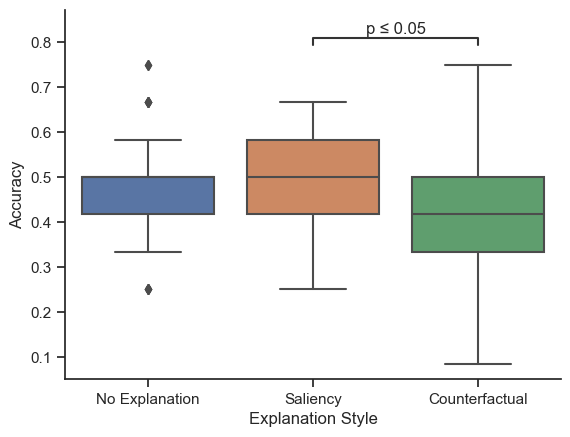

In [14]:
from statannotations.Annotator import Annotator

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

plotting_parameters = {
    'data':XNLP_full_data_quant_processed_green,
    'x':'Explanation_style',
    'y':'accuracy'
}

ax = sns.boxplot(**plotting_parameters)


pairs = [
         ('CE', 'SM')]

pvalues = [
   stats.ttest_ind(accuracy_CE, accuracy_SM).pvalue
]

# Transform each p-value to "p=" in scientific notation
formatted_pvalues = [f'p={pvalue:.2e}' for pvalue in pvalues]

annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)

labels = ['No Explanation', 'Saliency','Counterfactual']
ax.set_xticklabels(labels)
plt.xlabel('Explanation Style')
plt.ylabel('Accuracy')
# plt.title('Accuracy under three experiment conditions') # You can change the title here
plt.savefig('plot/accuracy_experiments_full_study.eps', format='eps', dpi=1000)
plt.show()



## Stereotype Activation t-test

In [15]:
stereotype_activation_NE = XNLP_full_data_quant_processed_green[XNLP_full_data_quant_processed_green.Explanation_style=='NE']['stereotype_activation']
stereotype_activation_CE = XNLP_full_data_quant_processed_green[XNLP_full_data_quant_processed_green.Explanation_style=='CE']['stereotype_activation']
stereotype_activation_SM = XNLP_full_data_quant_processed_green[XNLP_full_data_quant_processed_green.Explanation_style=='SM']['stereotype_activation']

In [16]:
t_test_reporting_two_sample(stereotype_activation_CE, stereotype_activation_NE)

t-statistic: 2.2861
p-value: 0.0234
df: 184.0000
mean group1 0.1900
mean group1 0.0968
std group1 0.3365
std group2 0.1990


In [17]:
# flip the comparison order
random.seed(1234)
d_stereotype_activation_CE_NE,d_CI_stereotype_activation_CE_NE = cohen_effect_size(stereotype_activation_CE, stereotype_activation_NE)
print('Cohens d: %.4f' % d_stereotype_activation_CE_NE,'95% CI: ',[round(num, 4) for num in d_CI_stereotype_activation_CE_NE])


Check if s1/s2 falls into 0.5 to 2.0: 1.690746924742153


Cohens d: 0.3371 95% CI:  [0.0648, 0.5884]


In [18]:
t_test_reporting_two_sample(stereotype_activation_SM, stereotype_activation_NE)

t-statistic: 0.8973
p-value: 0.3707
df: 188.0000
mean group1 0.1271
mean group1 0.0968
std group1 0.2597
std group2 0.1990


In [19]:
t_test_reporting_two_sample(stereotype_activation_CE, stereotype_activation_SM)

t-statistic: 1.4362
p-value: 0.1526
df: 188.0000
mean group1 0.1900
mean group1 0.1271
std group1 0.3365
std group2 0.2597


NE vs. CE: Custom statistical test, P_val:2.339e-02


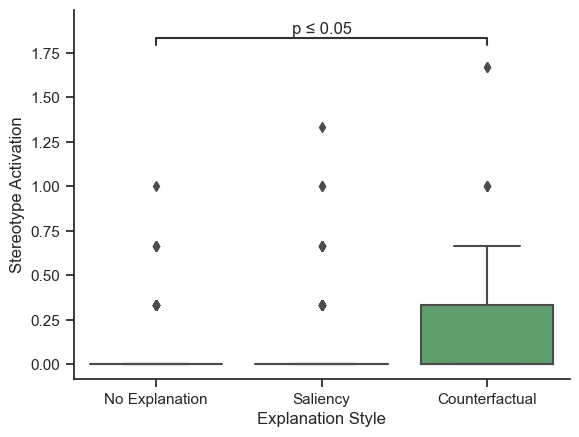

In [20]:
from statannotations.Annotator import Annotator

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

plotting_parameters = {
    'data':XNLP_full_data_quant_processed_green,
    'x':'Explanation_style',
    'y':'stereotype_activation',
}

ax = sns.boxplot(**plotting_parameters)


pairs = [('NE', 'CE')]

pvalues = [
    stats.ttest_ind(stereotype_activation_NE, stereotype_activation_CE).pvalue
 ]

# Transform each p-value to "p=" in scientific notation
formatted_pvalues = [f'p={pvalue:.2e}' for pvalue in pvalues]

annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)

labels = ['No Explanation', 'Saliency','Counterfactual']
ax.set_xticklabels(labels)
plt.xlabel('Explanation Style')
plt.ylabel('Stereotype Activation')
# plt.title('Penetrated bias under three experiment conditions') # You can change the title here
plt.savefig('plot/stereotype_activation_experiments_full_study.eps', format='eps', dpi=1000)
plt.show()



## Mental discomfort t-test

In [21]:
mental_dis_NE = XNLP_full_data_quant_processed_green[XNLP_full_data_quant_processed_green.Explanation_style=='NE']['mental_discomfort']
mental_dis_CE = XNLP_full_data_quant_processed_green[XNLP_full_data_quant_processed_green.Explanation_style=='CE']['mental_discomfort']
mental_dis_SM = XNLP_full_data_quant_processed_green[XNLP_full_data_quant_processed_green.Explanation_style=='SM']['mental_discomfort']

In [22]:
t_test_reporting_two_sample(mental_dis_NE, mental_dis_CE)

t-statistic: 0.5923
p-value: 0.5544
df: 184.0000
mean group1 3.4194
mean group1 2.9140
std group1 5.9121
std group2 5.6600


Significant difference between the two groups in terms of mental discomfort.

In [23]:
t_test_reporting_two_sample(mental_dis_SM, mental_dis_NE)

t-statistic: -2.1535
p-value: 0.0326
df: 188.0000
mean group1 1.7010
mean group1 3.4194
std group1 5.0076
std group2 5.9121


In [24]:
d_mental_dis_NE_SM, d_CI_mental_dis_NE_SM = cohen_effect_size(mental_dis_NE, mental_dis_SM)
print('Cohens d: %.4f' % d_mental_dis_NE_SM, '95% CI: ', [round(num, 4) for num in d_CI_mental_dis_NE_SM])


Check if s1/s2 falls into 0.5 to 2.0: 1.1806412049603792
Cohens d: 0.3142 95% CI:  [0.0422, 0.5963]


In [25]:
t_test_reporting_two_sample(mental_dis_CE, mental_dis_SM)

t-statistic: 1.5578
p-value: 0.1210
df: 188.0000
mean group1 2.9140
mean group1 1.7010
std group1 5.6600
std group2 5.0076


NE vs. SM: Custom statistical test, P_val:3.255e-02


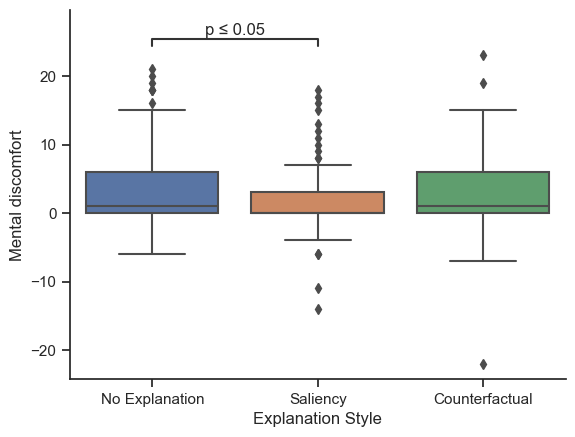

In [26]:
from statannotations.Annotator import Annotator

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

plotting_parameters = {
    'data':XNLP_full_data_quant_processed_green,
    'x':'Explanation_style',
    'y':'mental_discomfort'
}

ax = sns.boxplot(**plotting_parameters)


pairs = [
         ('NE', 'SM')]

pvalues = [
    stats.ttest_ind(mental_dis_NE, mental_dis_SM).pvalue
]

# Transform each p-value to "p=" in scientific notation
formatted_pvalues = [f'p={pvalue:.2e}' for pvalue in pvalues]

annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)

labels = ['No Explanation', 'Saliency','Counterfactual']
ax.set_xticklabels(labels)
plt.xlabel('Explanation Style')
plt.ylabel('Mental discomfort')
# plt.title('Mental discomfort measures under three experiment conditions') # You can change the title here
plt.savefig('plot/mental_discomfort_experiments_full_study.eps', format='eps', dpi=1000)
plt.show()



## Workload t-test

In [27]:
workload_NE = XNLP_full_data_quant_processed_green[XNLP_full_data_quant_processed_green.Explanation_style=='NE']['perceived_workload']
workload_CE = XNLP_full_data_quant_processed_green[XNLP_full_data_quant_processed_green.Explanation_style=='CE']['perceived_workload']
workload_SM = XNLP_full_data_quant_processed_green[XNLP_full_data_quant_processed_green.Explanation_style=='SM']['perceived_workload']

In [28]:
t_test_reporting_two_sample(workload_CE, workload_NE)

t-statistic: 1.5738
p-value: 0.1173
df: 184.0000
mean group1 3.4606
mean group1 3.2652
std group1 0.8962
std group2 0.7837


In [29]:
t_test_reporting_two_sample(workload_SM, workload_NE)

t-statistic: 0.7411
p-value: 0.4596
df: 188.0000
mean group1 3.3540
mean group1 3.2652
std group1 0.8543
std group2 0.7837


In [30]:
t_test_reporting_two_sample(workload_CE, workload_SM)

t-statistic: 0.8352
p-value: 0.4047
df: 188.0000
mean group1 3.4606
mean group1 3.3540
std group1 0.8962
std group2 0.8543


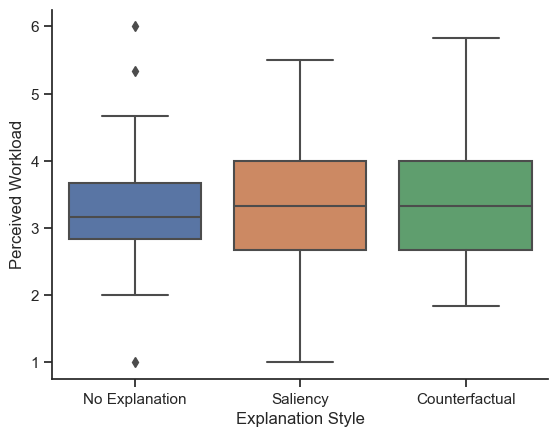

In [31]:
from statannotations.Annotator import Annotator

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

plotting_parameters = {
    'data':XNLP_full_data_quant_processed_green,
    'x':'Explanation_style',
    'y':'perceived_workload'
}

ax = sns.boxplot(**plotting_parameters)

labels = ['No Explanation', 'Saliency', 'Counterfactual']
ax.set_xticklabels(labels)
plt.xlabel('Explanation Style')
plt.ylabel('Perceived Workload')
# plt.title('Perceived Workload under three experiment conditions') # You can change the title here
plt.savefig('plot/workload_experiments_full_study.eps', format='eps', dpi=1000)
plt.show()

## Lable time t-test

In [32]:
labeltime_NE = XNLP_full_data_quant_processed_green[XNLP_full_data_quant_processed_green.Explanation_style=='NE']['label_time']
labeltime_CE = XNLP_full_data_quant_processed_green[XNLP_full_data_quant_processed_green.Explanation_style=='CE']['label_time']
labeltime_SM = XNLP_full_data_quant_processed_green[XNLP_full_data_quant_processed_green.Explanation_style=='SM']['label_time']

Significant results

In [33]:
t_test_reporting_two_sample(labeltime_CE, labeltime_NE)

t-statistic: 4.5598
p-value: 0.0000
df: 184.0000
mean group1 303.6879
mean group1 204.9347
std group1 178.3046
std group2 106.5804


In [34]:
d_labeltime_CE_NE, d_CI_labeltime_CE_NE = cohen_effect_size(labeltime_CE, labeltime_NE)
print('Cohens d: %.5f' % d_labeltime_CE_NE, '95% CI: ',[round(num, 4) for num in d_CI_labeltime_CE_NE])

Check if s1/s2 falls into 0.5 to 2.0: 1.6729585483119929


Cohens d: 0.67230 95% CI:  [0.4212, 0.9244]


Significant results

In [35]:
t_test_reporting_two_sample(labeltime_SM, labeltime_NE)

t-statistic: 2.7135
p-value: 0.0073
df: 188.0000
mean group1 272.2589
mean group1 204.9347
std group1 213.9079
std group2 106.5804


In [36]:
d_labeltime_SM_NE, d_CI_labeltime_SM_NE = cohen_effect_size(labeltime_SM, labeltime_NE)
print('Cohens d: %.5f' % d_labeltime_SM_NE, '95% CI: ', [round(num, 4) for num in d_CI_labeltime_SM_NE])

Check if s1/s2 falls into 0.5 to 2.0: 2.0070094041059847
Cohens d: 0.39586 95% CI:  [0.1594, 0.6237]


In [37]:
t_test_reporting_two_sample(labeltime_CE, labeltime_SM)

t-statistic: 1.0919
p-value: 0.2763
df: 188.0000
mean group1 303.6879
mean group1 272.2589
std group1 178.3046
std group2 213.9079


NE vs. SM: Custom statistical test, P_val:7.277e-03
NE vs. CE: Custom statistical test, P_val:9.322e-06


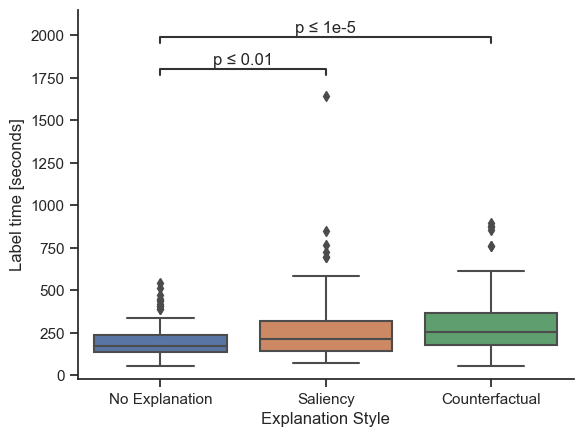

In [38]:
from statannotations.Annotator import Annotator

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

plotting_parameters = {
    'data':XNLP_full_data_quant_processed_green,
    'x':'Explanation_style',
    'y':'label_time'
}

ax = sns.boxplot(**plotting_parameters)


pairs = [('NE', 'CE'),
         ('NE', 'SM')]

pvalues = [
    stats.ttest_ind(labeltime_NE, labeltime_CE).pvalue,
    stats.ttest_ind(labeltime_NE, labeltime_SM).pvalue,
]

# Transform each p-value to "p=" in scientific notation
formatted_pvalues = [f'p={pvalue:.2e}' for pvalue in pvalues]

annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)

labels = ['No Explanation', 'Saliency','Counterfactual']
ax.set_xticklabels(labels)
plt.xlabel('Explanation Style')
plt.ylabel('Label time [seconds]')
# plt.title('Completion time under three experiment conditions') # You can change the title here
plt.savefig('plot/duration_experiments_full_study.eps', format='eps', dpi=1000)
plt.show()

# Experiments + Ethnicity

In [39]:
def t_test(df, metric, asian_flag1,asian_flag2, condition1, condition2):
    condition1_metric = df[(df.Explanation_style==condition1) & (df.Asian_race==asian_flag1)][metric].dropna()
    condition2_metric = df[(df.Explanation_style==condition2) & (df.Asian_race==asian_flag2)][metric].dropna()
    print(metric,asian_flag1,asian_flag2, condition1, condition2)
    t_stats = stats.ttest_ind(condition1_metric, condition2_metric)
    print('t stats: %.4f p-value %.4f' %(t_stats.statistic,t_stats.pvalue))
    df = len(condition1_metric) + len(condition2_metric) - 2
    print('df:',format(df, '.4f'))
    print('mean group1',format(np.mean(condition1_metric),'.4f'))
    print('mean group1',format(np.mean(condition2_metric),'.4f'))
    print('std group1',format(np.std(condition1_metric),'.4f'))
    print('std group2',format(np.std(condition2_metric),'.4f'))
    
    effect_size, effect_size_CI = cohen_effect_size(condition1_metric, condition2_metric)
    print('Cohens d: %.4f' %effect_size, '95% CI:', [round(num, 4) for num in effect_size_CI])
    return t_stats.statistic, t_stats.pvalue, effect_size, effect_size_CI

## t-test for Accuracy

In [40]:
# non asian NE vs asian NE
t_test(df = XNLP_full_data_quant_processed_green, metric='accuracy', asian_flag1=0,asian_flag2=1, condition1='NE', condition2='NE')

accuracy 0 1 NE NE
t stats: -0.1369 p-value 0.8914
df: 91.0000
mean group1 0.4635
mean group1 0.4667
std group1 0.1088
std group2 0.1089
Check if s1/s2 falls into 0.5 to 2.0: 0.9993436563192186
Cohens d: -0.0287 95% CI: [-0.443, 0.3853]


(-0.13688902960513094,
 0.8914209147913329,
 -0.028714689382926654,
 array([-0.44300574,  0.38530302]))

In [41]:
# non asian CE vs asian CE
t_test(df = XNLP_full_data_quant_processed_green, metric='accuracy', asian_flag1=0,asian_flag2=1, condition1='CE', condition2='CE')

accuracy 0 1 CE CE
t stats: -0.6885 p-value 0.4929
df: 91.0000
mean group1 0.4309
mean group1 0.4475
std group1 0.1064
std group2 0.1233
Check if s1/s2 falls into 0.5 to 2.0: 0.862979895197421
Cohens d: -0.1444 95% CI: [-0.5561, 0.265]


(-0.68850339513549,
 0.4928873632016979,
 -0.14436037904466348,
 array([-0.55607287,  0.26502058]))

In [42]:
# non asian SM vs asian SM
t_test(df = XNLP_full_data_quant_processed_green, metric='accuracy', asian_flag1=0,asian_flag2=1, condition1='SM', condition2='SM')

accuracy 0 1 SM SM
t stats: -0.6716 p-value 0.5035
df: 95.0000
mean group1 0.4687
mean group1 0.4830
std group1 0.1043
std group2 0.1024
Check if s1/s2 falls into 0.5 to 2.0: 1.019141810393745
Cohens d: -0.1378 95% CI: [-0.5482, 0.2746]


(-0.6715611337580979,
 0.5034929090389686,
 -0.13780904408323555,
 array([-0.5481813 ,  0.27455417]))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


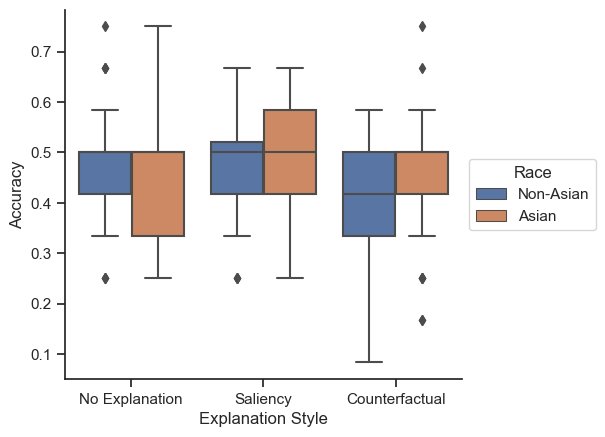

In [43]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
ax = sns.boxplot(
    data=XNLP_full_data_quant_processed_green.replace({"Asian_race" : {1 : "Asian", 0 : "Non-Asian"}}), x="Explanation_style", y="accuracy", hue="Asian_race", hue_order=["Non-Asian", "Asian"])
labels = ['No Explanation', 'Saliency','Counterfactual']
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend_.set_title('Race')
ax.set_xticklabels(labels)
plt.xlabel('Explanation Style')
plt.ylabel('Accuracy')
# plt.title('Accuracy under three experiment conditions') # You can change the title here
plt.savefig('plot/accuracy_experiments_asian_full_study.eps', format='eps', dpi=1000)
plt.show()


## t-test for Stereotype Activation

In [44]:
# RELU penetrated bias: non-asian SM vs asian SM
_,p_value_sa_01_SM,_,_ = t_test(df = XNLP_full_data_quant_processed_green, metric='stereotype_activation', asian_flag1=0,asian_flag2=1, condition1='SM', condition2='SM')

stereotype_activation 0 1 SM SM
t stats: 1.7535 p-value 0.0827
df: 95.0000
mean group1 0.1736
mean group1 0.0816
std group1 0.2965
std group2 0.2079
Check if s1/s2 falls into 0.5 to 2.0: 1.4261813037351738
Cohens d: 0.3598 95% CI: [-0.0419, 0.7586]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


SM_Non-Asian vs. SM_Asian: Custom statistical test, P_val:8.274e-02


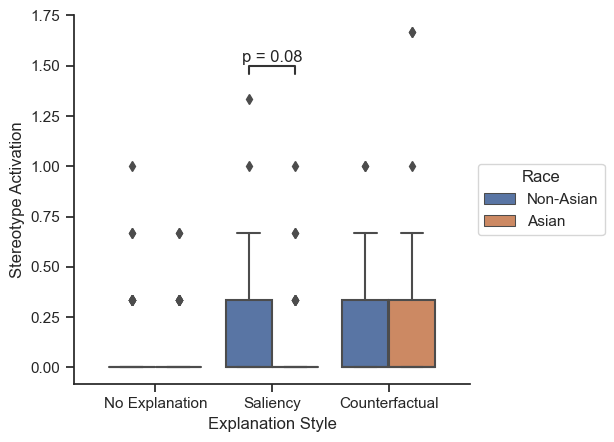

In [45]:

from statannotations.Annotator import Annotator

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

plotting_parameters = {
    'data':XNLP_full_data_quant_processed_green.replace({"Asian_race" : {1 : "Asian", 0 : "Non-Asian"}}),
    'x':'Explanation_style',
    'y':'stereotype_activation', 
    'hue':'Asian_race',
    'hue_order': ["Non-Asian", "Asian"],
}

ax = sns.boxplot(**plotting_parameters)


pairs = [[('SM', 'Non-Asian'),('SM', 'Asian')]]

pvalues = [p_value_sa_01_SM]

# Transform each p-value to "p=" in scientific notation
formatted_pvalues = [f'p={pvalue:.2e}' for pvalue in pvalues]

annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)

labels = ['No Explanation', 'Saliency','Counterfactual']
ax.set_xticklabels(labels)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend_.set_title('Race')
plt.xlabel('Explanation Style')
plt.ylabel('Stereotype Activation')
# plt.title('Penetrated bias under three experiment conditions') # You can change the title here
plt.savefig('plot/stereotype_activation_experiments_asian_full_study.eps', format='eps', dpi=1000)
plt.show()

## t-test for mental discomfort

### t-test for mental discomfort (non-Asian v.ss Asian under same condition)

In [46]:
# non asian NE vs non asian NE
t_test(df = XNLP_full_data_quant_processed_green, metric='mental_discomfort', asian_flag1=0,asian_flag2=1, condition1='NE', condition2='NE')


mental_discomfort 0 1 NE NE
t stats: -0.1781 p-value 0.8590
df: 91.0000
mean group1 3.3125
mean group1 3.5333
std group1 6.0213
std group2 5.7912
Check if s1/s2 falls into 0.5 to 2.0: 1.0397426517355435
Cohens d: -0.0374 95% CI: [-0.4495, 0.3828]


(-0.17809905676374382,
 0.8590410554895014,
 -0.03735863561851055,
 array([-0.44951036,  0.38283053]))

In [47]:
# non asian CF vs asian CF
_,md_01_CE_p_value,_,_ = t_test(df = XNLP_full_data_quant_processed_green, metric='mental_discomfort', asian_flag1=1,asian_flag2=0, condition1='CE', condition2='CE')

mental_discomfort 1 0 CE CE
t stats: 2.0370 p-value 0.0446
df: 91.0000
mean group1 4.1087
mean group1 1.7447
std group1 5.2138
std group2 5.8327
Check if s1/s2 falls into 0.5 to 2.0: 0.8938996096065013
Cohens d: 0.4271 95% CI: [0.0465, 0.8022]


In [48]:
# non asian SM vs asian SM
t_test(df = XNLP_full_data_quant_processed_green, metric='mental_discomfort', asian_flag1=0,asian_flag2=1, condition1='SM', condition2='SM')


mental_discomfort 0 1 SM SM
t stats: -0.1465 p-value 0.8838
df: 95.0000
mean group1 1.6250
mean group1 1.7755
std group1 4.7065
std group2 5.2848
Check if s1/s2 falls into 0.5 to 2.0: 0.8905695847922018
Cohens d: -0.0301 95% CI: [-0.4556, 0.3566]


(-0.1464867497592246,
 0.883847553774223,
 -0.030059668358020993,
 array([-0.45564212,  0.35657389]))

### t-test for mental discomfort (Asian under different conditions)

In [49]:
# asian NE vs asian CF
t_test(df = XNLP_full_data_quant_processed_green, metric='mental_discomfort', asian_flag1=1,asian_flag2=1, condition1='NE', condition2='CE')

mental_discomfort 1 1 NE CE
t stats: -0.4928 p-value 0.6234
df: 89.0000
mean group1 3.5333
mean group1 4.1087
std group1 5.7912
std group2 5.2138
Check if s1/s2 falls into 0.5 to 2.0: 1.1107383305935292
Cohens d: -0.1045 95% CI: [-0.5533, 0.3081]


(-0.4928030422782947,
 0.6233654041266847,
 -0.10448169612792972,
 array([-0.55331008,  0.30806008]))

In [50]:
# asian NE vs asian SM
t_test(df = XNLP_full_data_quant_processed_green, metric='mental_discomfort', asian_flag1=1,asian_flag2=1, condition1='NE', condition2='SM')

mental_discomfort 1 1 NE SM
t stats: 1.5222 p-value 0.1314
df: 92.0000
mean group1 3.5333
mean group1 1.7755
std group1 5.7912
std group2 5.2848
Check if s1/s2 falls into 0.5 to 2.0: 1.0958167213558718
Cohens d: 0.3177 95% CI: [-0.0864, 0.7095]


(1.5222444173536829,
 0.1313777432657464,
 0.3177111337169478,
 array([-0.08637323,  0.70952701]))

Significant result

In [51]:
# asian CF vs asian SM
_,md_asian_CE_SM_p_value,_,_= t_test(df = XNLP_full_data_quant_processed_green, metric='mental_discomfort', asian_flag1=1,asian_flag2=1, condition1='CE', condition2='SM')

mental_discomfort 1 1 CE SM
t stats: 2.1416 p-value 0.0348
df: 93.0000
mean group1 4.1087
mean group1 1.7755
std group1 5.2138
std group2 5.2848
Check if s1/s2 falls into 0.5 to 2.0: 0.9865660445609327
Cohens d: 0.4444 95% CI: [0.0573, 0.8395]


### t-test for mental discomfort (non-Asian under different conditions)

In [52]:
# non-asian NE vs non-asian CF
t_test(df = XNLP_full_data_quant_processed_green, metric='mental_discomfort', asian_flag1=0,asian_flag2=0, condition1='NE', condition2='CE')

mental_discomfort 0 0 NE CE
t stats: 1.2750 p-value 0.2055
df: 93.0000
mean group1 3.3125
mean group1 1.7447
std group1 6.0213
std group2 5.8327
Check if s1/s2 falls into 0.5 to 2.0: 1.0323485843484956
Cohens d: 0.2644 95% CI: [-0.1433, 0.6396]


(1.2750311731729962,
 0.2054743691268536,
 0.2644428459417832,
 array([-0.14325267,  0.63961327]))

In [53]:
# non-asian NE vs non-asian SM
t_test(df = XNLP_full_data_quant_processed_green, metric='mental_discomfort', asian_flag1=0,asian_flag2=0, condition1='NE', condition2='SM')

mental_discomfort 0 0 NE SM
t stats: 1.5138 p-value 0.1334
df: 94.0000
mean group1 3.3125
mean group1 1.6250
std group1 6.0213
std group2 4.7065
Check if s1/s2 falls into 0.5 to 2.0: 1.279369297060099
Cohens d: 0.3123 95% CI: [-0.0953, 0.7079]


(1.5137641229748433,
 0.13344087492275367,
 0.31226569565211243,
 array([-0.09534142,  0.70792651]))

In [54]:
# non-asian CF vs non-asian SM
t_test(df = XNLP_full_data_quant_processed_green, metric='mental_discomfort', asian_flag1=0,asian_flag2=0, condition1='CE', condition2='SM')

mental_discomfort 0 0 CE SM
t stats: 0.1090 p-value 0.9134
df: 93.0000
mean group1 1.7447
mean group1 1.6250
std group1 5.8327
std group2 4.7065
Check if s1/s2 falls into 0.5 to 2.0: 1.2392803326867499
Cohens d: 0.0226 95% CI: [-0.3653, 0.4888]


(0.10900707256962397,
 0.9134317384703404,
 0.022608808225389236,
 array([-0.36528265,  0.4887836 ]))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


CE_Non-Asian vs. CE_Asian: Custom statistical test, P_val:4.456e-02
SM_Asian vs. CE_Asian: Custom statistical test, P_val:3.484e-02


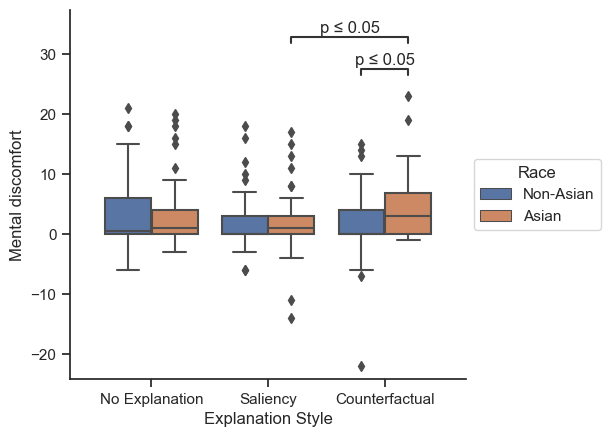

In [55]:
from statannotations.Annotator import Annotator

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

plotting_parameters = {
    'data':XNLP_full_data_quant_processed_green.replace({"Asian_race" : {1 : "Asian", 0 : "Non-Asian"}}),
    'x':'Explanation_style',
    'y':'mental_discomfort', 
    'hue':'Asian_race',
    'hue_order': ["Non-Asian", "Asian"],
}

ax = sns.boxplot(**plotting_parameters)


pairs = [[('CE', 'Non-Asian'),('CE', 'Asian')],
         [('CE', 'Asian'),('SM', 'Asian')]]

pvalues = [md_01_CE_p_value, md_asian_CE_SM_p_value]

# Transform each p-value to "p=" in scientific notation
formatted_pvalues = [f'p={pvalue:.2e}' for pvalue in pvalues]

annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)

labels = ['No Explanation', 'Saliency','Counterfactual']
ax.set_xticklabels(labels)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend_.set_title('Race')
plt.xlabel('Explanation Style')
plt.ylabel('Mental discomfort')
# plt.title('Mental discomfort measures under three experiment conditions') # You can change the title here
plt.savefig('plot/mental_discomfort_experiments_asian_full_study.eps', format='eps', dpi=1000)
plt.show()

## t-test for duration

### t-test for duration (non-Asian vs Asian under same condition)

In [56]:
# non asian NE vs asian NE
t_test(df = XNLP_full_data_quant_processed_green, metric='label_time', asian_flag1=0,asian_flag2=1, condition1='NE', condition2='NE')


label_time 0 1 NE NE
t stats: 1.1803 p-value 0.2410
df: 91.0000
mean group1 217.6059
mean group1 191.4187
std group1 117.0353
std group2 92.2588
Check if s1/s2 falls into 0.5 to 2.0: 1.2685537924928127
Cohens d: 0.2476 95% CI: [-0.151, 0.6478]


(1.180253490273188,
 0.24097539685978814,
 0.24755687737797447,
 array([-0.15101806,  0.64781164]))

In [57]:
# non asian CF vs asian CF
_,label_01_CE_p_value,_,_ = t_test(df = XNLP_full_data_quant_processed_green, metric='label_time', asian_flag1=0,asian_flag2=1, condition1='CE', condition2='CE')


label_time 0 1 CE CE
t stats: 2.5587 p-value 0.0122
df: 91.0000
mean group1 349.3864
mean group1 256.9960
std group1 196.7625
std group2 142.8468
Check if s1/s2 falls into 0.5 to 2.0: 1.377436912737826
Cohens d: 0.5365 95% CI: [0.1451, 0.9367]


In [58]:
# non asian SM vs asian SM
t_test(df = XNLP_full_data_quant_processed_green, metric='label_time', asian_flag1=0,asian_flag2=1, condition1='SM', condition2='SM')


label_time 0 1 SM SM
t stats: 0.8285 p-value 0.4094
df: 95.0000
mean group1 290.5648
mean group1 254.3265
std group1 165.6505
std group2 251.0964
Check if s1/s2 falls into 0.5 to 2.0: 0.6597085536571647
Cohens d: 0.1700 95% CI: [-0.2032, 0.7567]


(0.8285396680742162,
 0.40944171467391943,
 0.1700145571151379,
 array([-0.2031837 ,  0.75667231]))

### t-test for duration (Asian under different conditions)

In [59]:
# asian NE vs asian CF
_,label_11_NE_CE_p_value,_,_ = t_test(df = XNLP_full_data_quant_processed_green, metric='label_time', asian_flag1=1,asian_flag2=1, condition1='NE', condition2='CE')

label_time 1 1 NE CE
t stats: -2.5666 p-value 0.0119
df: 89.0000
mean group1 191.4187
mean group1 256.9960
std group1 92.2588
std group2 142.8468
Check if s1/s2 falls into 0.5 to 2.0: 0.6458587015170965
Cohens d: -0.5441 95% CI: [-0.9309, -0.1753]


In [60]:
# asian NE vs asian SM
t_test(df = XNLP_full_data_quant_processed_green, metric='label_time', asian_flag1=1,asian_flag2=1, condition1='NE', condition2='SM')

label_time 1 1 NE SM
t stats: -1.5683 p-value 0.1203
df: 92.0000
mean group1 191.4187
mean group1 254.3265
std group1 92.2588
std group2 251.0964
Check if s1/s2 falls into 0.5 to 2.0: 0.3674239450874339
Cohens d: -0.3272 95% CI: [-0.5852, 0.0318]


(-1.5682712717290663,
 0.12025105617575771,
 -0.3271919415132122,
 array([-0.58516075,  0.031777  ]))

In [61]:
# asian CF vs asian SM
t_test(df = XNLP_full_data_quant_processed_green, metric='label_time', asian_flag1=1,asian_flag2=1, condition1='CE', condition2='SM')

label_time 1 1 CE SM
t stats: 0.0625 p-value 0.9503
df: 93.0000
mean group1 256.9960
mean group1 254.3265
std group1 142.8468
std group2 251.0964
Check if s1/s2 falls into 0.5 to 2.0: 0.5688921496673648
Cohens d: 0.0130 95% CI: [-0.3176, 0.5643]


(0.062478413861021036,
 0.9503159359145126,
 0.012961671950732888,
 array([-0.31764839,  0.56426894]))

### t-test for duration (non-Asian under different conditions)

In [62]:
# non-asian NE vs non-asian CF
_,label_nonasian_NE_CE_p_value,_,_ = t_test(df = XNLP_full_data_quant_processed_green, metric='label_time', asian_flag1=0,asian_flag2=0, condition1='NE', condition2='CE')

label_time 0 0 NE CE
t stats: -3.9349 p-value 0.0002
df: 93.0000
mean group1 217.6059
mean group1 349.3864
std group1 117.0353
std group2 196.7625
Check if s1/s2 falls into 0.5 to 2.0: 0.5948051033390148
Cohens d: -0.8161 95% CI: [-1.1831, -0.4694]


In [63]:
# non-asian NE vs non-asian SM
_,label_nonasian_NE_SM_p_value,_,_  = t_test(df = XNLP_full_data_quant_processed_green, metric='label_time', asian_flag1=0,asian_flag2=0, condition1='NE', condition2='SM')

label_time 0 0 NE SM
t stats: -2.4661 p-value 0.0155
df: 94.0000
mean group1 217.6059
mean group1 290.5648
std group1 117.0353
std group2 165.6505
Check if s1/s2 falls into 0.5 to 2.0: 0.7065196235663106
Cohens d: -0.5087 95% CI: [-0.8943, -0.1369]


In [64]:
# non-asian CF vs non-asian SM
t_test(df = XNLP_full_data_quant_processed_green, metric='label_time', asian_flag1=0,asian_flag2=0, condition1='CE', condition2='SM')

label_time 0 0 CE SM
t stats: 1.5608 p-value 0.1220
df: 93.0000
mean group1 349.3864
mean group1 290.5648
std group1 196.7625
std group2 165.6505
Check if s1/s2 falls into 0.5 to 2.0: 1.187817017036626
Cohens d: 0.3237 95% CI: [-0.0807, 0.7181]


(1.5607943737749477,
 0.12196890764666395,
 0.32371786504032474,
 array([-0.08072343,  0.71814776]))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


CE_Non-Asian vs. CE_Asian: Custom statistical test, P_val:1.216e-02


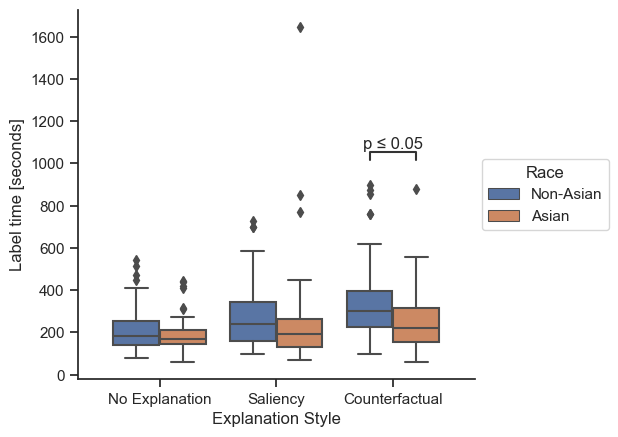

In [65]:
from statannotations.Annotator import Annotator

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

plotting_parameters = {
    'data':XNLP_full_data_quant_processed_green.replace({"Asian_race" : {1 : "Asian", 0 : "Non-Asian"}}),
    'x':'Explanation_style',
    'y':'label_time', 
    'hue':'Asian_race',
    'hue_order': ["Non-Asian", "Asian"],
}

ax = sns.boxplot(**plotting_parameters)


pairs = [[('CE', 'Non-Asian'),('CE', 'Asian')]]

pvalues = [label_01_CE_p_value]
   # Transform each p-value to "p=" in scientific notation
formatted_pvalues = [f'p={pvalue:.2e}' for pvalue in pvalues]

annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)

labels = ['No Explanation', 'Saliency','Counterfactual']
ax.set_xticklabels(labels)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend_.set_title('Race')
plt.xlabel('Explanation Style')
plt.ylabel('Label time [seconds]')
# plt.title('Completion time under three experiment conditions') # You can change the title here
plt.savefig('plot/duration_experiments_asian_full_study.eps', format='eps', dpi=1000)
plt.show()


## t-test for perceived workload

In [66]:
# non asian NE vs asian NE
_,workload_01_NE_p_value,_,_ = t_test(df = XNLP_full_data_quant_processed_green, metric='perceived_workload', asian_flag1=0,asian_flag2=1, condition1='NE', condition2='NE')


perceived_workload 0 1 NE NE
t stats: -2.0720 p-value 0.0411
df: 91.0000
mean group1 3.1042
mean group1 3.4370
std group1 0.6343
std group2 0.8849
Check if s1/s2 falls into 0.5 to 2.0: 0.7167993242621014
Cohens d: -0.4347 95% CI: [-0.8516, -0.0218]


In [67]:
# non asian SM vs asian SM
t_test(df = XNLP_full_data_quant_processed_green, metric='perceived_workload', asian_flag1=0,asian_flag2=1, condition1='SM', condition2='SM')

perceived_workload 0 1 SM SM
t stats: -1.4646 p-value 0.1463
df: 95.0000
mean group1 3.2257
mean group1 3.4796
std group1 0.7558
std group2 0.9238
Check if s1/s2 falls into 0.5 to 2.0: 0.8181348414402054
Cohens d: -0.3005 95% CI: [-0.7362, 0.1001]


(-1.4645653812633204,
 0.14634103969019296,
 -0.3005319998442764,
 array([-0.73618181,  0.10011518]))

In [68]:
# non asian CE vs asian CE
t_test(df = XNLP_full_data_quant_processed_green, metric='perceived_workload', asian_flag1=0,asian_flag2=1, condition1='CE', condition2='CE')

perceived_workload 0 1 CE CE
t stats: -1.3441 p-value 0.1823
df: 91.0000
mean group1 3.3369
mean group1 3.5870
std group1 0.9086
std group2 0.8651
Check if s1/s2 falls into 0.5 to 2.0: 1.0502807985481308
Cohens d: -0.2818 95% CI: [-0.7145, 0.129]


(-1.3440699698020508,
 0.18226713338114275,
 -0.2818082943256562,
 array([-0.71447809,  0.12895813]))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


NE_Non-Asian vs. NE_Asian: Custom statistical test, P_val:4.110e-02


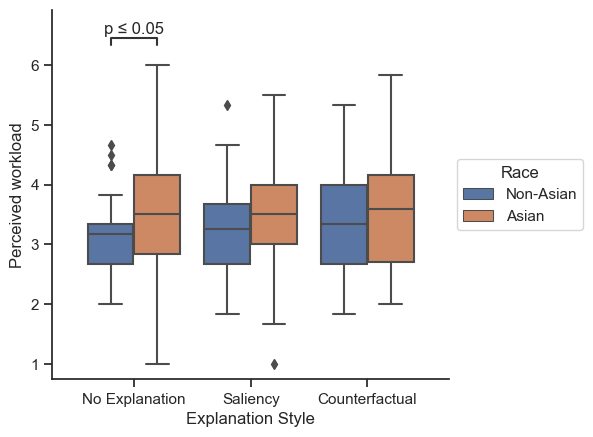

In [69]:
from statannotations.Annotator import Annotator

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

plotting_parameters = {
    'data':XNLP_full_data_quant_processed_green.replace({"Asian_race" : {1 : "Asian", 0 : "Non-Asian"}}),
    'x':'Explanation_style',
    'y':'perceived_workload', 
    'hue':'Asian_race',
    'hue_order': ["Non-Asian", "Asian"],
}

ax = sns.boxplot(**plotting_parameters)


pairs = [[('NE', 'Non-Asian'),('NE', 'Asian')]]

pvalues = [workload_01_NE_p_value]
    
# Transform each p-value to "p=" in scientific notation
formatted_pvalues = [f'p={pvalue:.2e}' for pvalue in pvalues]

annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)

labels = ['No Explanation', 'Saliency','Counterfactual']
ax.set_xticklabels(labels)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend_.set_title('Race')
plt.xlabel('Explanation Style')
plt.ylabel('Perceived workload')
# plt.title('Perceived workload under three experiment conditions') # You can change the title here
plt.savefig('plot/workload_experiments_asian_full_study.eps', format='eps', dpi=1000)
plt.show()

# Ratio Estimation

In [70]:
def prop_error(df, metric, asian_flag1,asian_flag2, condition1, condition2):
    condition1_metric = df[(df.Explanation_style==condition1) & (df.Asian_race==asian_flag1)][metric].dropna()
    condition2_metric = df[(df.Explanation_style==condition2) & (df.Asian_race==asian_flag2)][metric].dropna()
    avg_condition1_metric = np.mean(condition1_metric)
    avg_condition2_metric = np.mean(condition2_metric)
    std_condition1_metric = np.std(condition1_metric)
    std_condition2_metric = np.std(condition2_metric)
    prop_mean = avg_condition1_metric/avg_condition2_metric
    #prop_std = prop_mean*np.sqrt((std_condition1_metric/avg_condition1_metric)**2 + (std_condition2_metric/avg_condition2_metric)**2)
    prop_std = prop_mean*np.sqrt((std_condition1_metric/avg_condition1_metric)**2 + (std_condition2_metric/avg_condition2_metric)**2)
    prop_ci = (prop_mean - 1.96*prop_std/np.sqrt(len(condition1_metric)), prop_mean + 1.96*prop_std/np.sqrt(len(condition2_metric)))
    print('The propagated errors of {} for {}: mean {}, standard deviation {},\n95% confidence interval {}'.format(metric, condition1, prop_mean, prop_std, prop_ci))
    return prop_mean, prop_std

## Accuracy

In [71]:
# asian NE vs non asian NE
prop_mean , prop_std = prop_error(df = XNLP_full_data_quant_processed_green, metric='accuracy', asian_flag1=1,asian_flag2=0, condition1='NE', condition2='NE')

The propagated errors of accuracy for NE: mean 1.006741572799394, standard deviation 0.33314994730020236,
95% confidence interval (0.9094019714278673, 1.1009902365589919)


In [72]:
# asian CE vs non asian CE
prop_mean , prop_std = prop_error(df = XNLP_full_data_quant_processed_green, metric='accuracy', asian_flag1=1,asian_flag2=0, condition1='CE', condition2='CE')

The propagated errors of accuracy for CE: mean 1.0385578816379752, standard deviation 0.38432227206802394,
95% confidence interval (0.9274940355662713, 1.1484338449353768)


In [73]:
# asian SM vs non asian SM
prop_mean , prop_std = prop_error(df = XNLP_full_data_quant_processed_green, metric='accuracy', asian_flag1=1,asian_flag2=0, condition1='SM', condition2='SM')

The propagated errors of accuracy for SM: mean 1.0303854875909095, standard deviation 0.3167138939261349,
95% confidence interval (0.9417055972915918, 1.1199843650289403)


## Stereotype Activation

In [74]:
# asian NE vs non asian NE
prop_mean , prop_std = prop_error(df = XNLP_full_data_quant_processed_green, metric='stereotype_activation', asian_flag1=1,asian_flag2=0, condition1='NE', condition2='NE')

The propagated errors of stereotype_activation for NE: mean 0.853333333248, standard deviation 2.463361149043944,
95% confidence interval (0.1335895835484847, 1.5502222222787756)


In [75]:
# asian CE vs non asian CE
prop_mean , prop_std = prop_error(df = XNLP_full_data_quant_processed_green, metric='stereotype_activation', asian_flag1=1,asian_flag2=0, condition1='CE', condition2='CE')

The propagated errors of stereotype_activation for CE: mean 1.061036789506239, standard deviation 2.638364721568949,
95% confidence interval (0.298585704533774, 1.8153330829590384)


In [76]:
# asian SM vs non asian SM
prop_mean , prop_std = prop_error(df = XNLP_full_data_quant_processed_green, metric='stereotype_activation', asian_flag1=1,asian_flag2=0, condition1='SM', condition2='SM')

The propagated errors of stereotype_activation for SM: mean 0.4702040816467591, standard deviation 1.4418416282367548,
95% confidence interval (0.0664884257404677, 0.8781034312204955)


## Mental discomfort

In [77]:
# asian NE vs non asian NE
prop_mean , prop_std = prop_error(df = XNLP_full_data_quant_processed_green, metric='mental_discomfort', asian_flag1=1,asian_flag2=0, condition1='NE', condition2='NE')

The propagated errors of mental_discomfort for NE: mean 1.0666666666666667, standard deviation 2.610747100338185,
95% confidence interval (0.3038597561802251, 1.8052512818381468)


In [78]:
# asian CE vs non asian CE
prop_mean , prop_std = prop_error(df = XNLP_full_data_quant_processed_green, metric='mental_discomfort', asian_flag1=1,asian_flag2=0, condition1='CE', condition2='CE')

The propagated errors of mental_discomfort for CE: mean 2.354984093319194, standard deviation 8.421058394052062,
95% confidence interval (-0.07858585880756497, 4.762525810980483)


In [79]:
# asian SM vs non asian SM
prop_mean , prop_std = prop_error(df = XNLP_full_data_quant_processed_green, metric='mental_discomfort', asian_flag1=1,asian_flag2=0, condition1='SM', condition2='SM')

The propagated errors of mental_discomfort for SM: mean 1.0926216640502355, standard deviation 4.537751152313693,
95% confidence interval (-0.17794865859759867, 2.3763588702091196)


## Duration

In [80]:
# asian NE vs non asian NE
prop_mean , prop_std = prop_error(df = XNLP_full_data_quant_processed_green, metric='label_time', asian_flag1=1,asian_flag2=0, condition1='NE', condition2='NE')

The propagated errors of label_time for NE: mean 0.879657640505745, standard deviation 0.6352820011859822,
95% confidence interval (0.6940412318733078, 1.05937995535981)


In [81]:
# asian CE vs non asian CE
prop_mean , prop_std = prop_error(df = XNLP_full_data_quant_processed_green, metric='label_time', asian_flag1=1,asian_flag2=0, condition1='CE', condition2='CE')

The propagated errors of label_time for CE: mean 0.7355638078102197, standard deviation 0.5820284517860598,
95% confidence interval (0.5673655974106997, 0.9019630551459801)


In [82]:
# asian SM vs non asian SM
prop_mean , prop_std = prop_error(df = XNLP_full_data_quant_processed_green, metric='label_time', asian_flag1=1,asian_flag2=0, condition1='SM', condition2='SM')

The propagated errors of label_time for SM: mean 0.8752832464088447, standard deviation 0.9978889756776907,
95% confidence interval (0.5958743332190912, 1.1575876660859934)


## Workload

In [83]:
# asian NE vs non asian NE
prop_mean , prop_std = prop_error(df = XNLP_full_data_quant_processed_green, metric='perceived_workload', asian_flag1=1,asian_flag2=0, condition1='NE', condition2='NE')

The propagated errors of perceived_workload for NE: mean 1.107233407928956, standard deviation 0.36394592735511233,
95% confidence interval (1.000895850992126, 1.2101943047021377)


In [84]:
# asian CE vs non asian CE
prop_mean , prop_std = prop_error(df = XNLP_full_data_quant_processed_green, metric='perceived_workload', asian_flag1=1,asian_flag2=0, condition1='CE', condition2='CE')

The propagated errors of perceived_workload for CE: mean 1.0749433997494093, standard deviation 0.3910241418458018,
95% confidence interval (0.9619428055694408, 1.1867353966759957)


In [85]:
# asian NE vs non asian NE
prop_mean , prop_std = prop_error(df = XNLP_full_data_quant_processed_green, metric='perceived_workload', asian_flag1=1,asian_flag2=0, condition1='SM', condition2='SM')

The propagated errors of perceived_workload for SM: mean 1.0787109246355622, standard deviation 0.3819486771115674,
95% confidence interval (0.9717652950443233, 1.1867648286935848)


## Rationales

In [86]:
# insert new columns to keep track of presence of rationales

data = XNLP_full_data_quant_processed_green.assign(isRat1=0, isRat2=0, isRat3=0, isRat4=0, isRat5=0, isRat6=0, isRat7=0,
                         isRat8=0, isRat9=0, isRat10=0, isRat11=0, isRat12=0)

data.loc[data['Rationale1'].isnull() == False, 'isRat1'] = 1
data.loc[data['Rationale2'].isnull() == False, 'isRat2'] = 1
data.loc[data['Rationale3'].isnull() == False, 'isRat3'] = 1
data.loc[data['Rationale4'].isnull() == False, 'isRat4'] = 1
data.loc[data['Rationale5'].isnull() == False, 'isRat5'] = 1
data.loc[data['Rationale6'].isnull() == False, 'isRat6'] = 1
data.loc[data['Rationale7'].isnull() == False, 'isRat7'] = 1
data.loc[data['Rationale8'].isnull() == False, 'isRat8'] = 1
data.loc[data['Rationale9'].isnull() == False, 'isRat9'] = 1
data.loc[data['Rationale10'].isnull() == False, 'isRat10'] = 1
data.loc[data['Rationale11'].isnull() == False, 'isRat11'] = 1
data.loc[data['Rationale12'].isnull() == False, 'isRat12'] = 1

# add a column for sum of rationales present

data['rationaleSum'] = data[['isRat1', 'isRat2', 'isRat3', 'isRat4', 'isRat5', 'isRat6', 'isRat7',
                         'isRat8', 'isRat9', 'isRat10', 'isRat11', 'isRat12']].sum(axis=1)

### t-tests for Explanation Type

In [87]:
rationales_NE = data[data.Explanation_style=='NE']['rationaleSum']
rationales_SM = data[data.Explanation_style=='SM']['rationaleSum']
rationales_CE = data[data.Explanation_style=='CE']['rationaleSum']

In [88]:
stats.ttest_ind(rationales_NE, rationales_CE)

Ttest_indResult(statistic=-0.9024074696936998, pvalue=0.3680202417373498)

In [89]:
stats.ttest_ind(rationales_NE, rationales_SM)

Ttest_indResult(statistic=-0.8624933705720809, pvalue=0.38951494859850655)

In [90]:
stats.ttest_ind(rationales_SM, rationales_CE)

Ttest_indResult(statistic=-0.04714584016813662, pvalue=0.9624470372208237)

### t-tests for Race

In [91]:
t_test(df = data, metric='rationaleSum', asian_flag1=0,asian_flag2=1, condition1='NE', condition2='NE')

rationaleSum 0 1 NE NE
t stats: -0.0074 p-value 0.9941
df: 91.0000
mean group1 3.4375
mean group1 3.4444
std group1 4.6454
std group2 4.2976
Check if s1/s2 falls into 0.5 to 2.0: 1.0809277536710846
Cohens d: -0.0015 95% CI: [-0.4281, 0.4218]


(-0.007388909226135404,
 0.9941207313593289,
 -0.0015499003701349395,
 array([-0.42812458,  0.42183622]))

In [92]:
t_test(df = data, metric='rationaleSum', asian_flag1=0,asian_flag2=1, condition1='CE', condition2='CE')

rationaleSum 0 1 CE CE
t stats: -0.9296 p-value 0.3550
df: 91.0000
mean group1 3.5957
mean group1 4.5435
std group1 4.6295
std group2 5.0892
Check if s1/s2 falls into 0.5 to 2.0: 0.9096668251451938


Cohens d: -0.1949 95% CI: [-0.6367, 0.2184]


(-0.9296236587842072,
 0.35502545367442906,
 -0.19491552164678022,
 array([-0.63666931,  0.21835362]))

In [93]:
t_test(df = data, metric='rationaleSum', asian_flag1=0,asian_flag2=1, condition1='SM', condition2='SM')

rationaleSum 0 1 SM SM
t stats: -0.4321 p-value 0.6666
df: 95.0000
mean group1 3.8125
mean group1 4.2449
std group1 4.6532
std group2 5.0851
Check if s1/s2 falls into 0.5 to 2.0: 0.9150644772449333
Cohens d: -0.0887 95% CI: [-0.4995, 0.3155]


(-0.4321289763961053,
 0.6666269408324857,
 -0.08867485630733968,
 array([-0.49949693,  0.31552692]))

### Rationale Plots

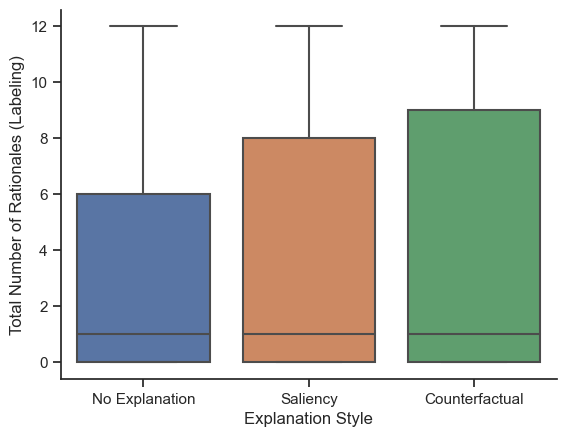

In [94]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

plotting_parameters = {
    'data':data,
    'x':'Explanation_style',
    'y':'rationaleSum'
}

ax = sns.boxplot(**plotting_parameters)

labels = ['No Explanation', 'Saliency','Counterfactual']
ax.set_xticklabels(labels)
plt.xlabel('Explanation Style')
plt.ylabel('Total Number of Rationales (Labeling)')
plt.savefig('plot/numRationales_experiments_full_study.eps', format='eps', dpi=1000)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


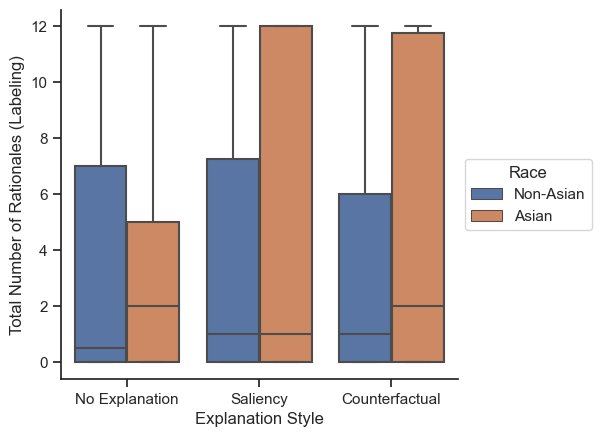

In [95]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
ax = sns.boxplot(
    data=data.replace({"Asian_race" : {1 : "Asian", 0 : "Non-Asian"}}), x="Explanation_style", y="rationaleSum", hue="Asian_race", hue_order=["Non-Asian", "Asian"])
labels = ['No Explanation', 'Saliency','Counterfactual']
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend_.set_title('Race')
ax.set_xticklabels(labels)
plt.xlabel('Explanation Style')
plt.ylabel('Total Number of Rationales (Labeling)')
plt.savefig('plot/numRationales_experiments_asian_full_study.eps', format='eps', dpi=1000)
plt.show()

In [96]:
# Calculate the number of rationales left per question --> dies off as experiment continues

isRats = ['isRat1', 'isRat2', 'isRat3', 'isRat4', 'isRat5', 'isRat6', 'isRat7', 'isRat8', 'isRat9', 'isRat10', 'isRat11', 'isRat12']
num_per_question_all = []

for rat in isRats:
  num_per_question_all.append(data[rat].sum())

percent_rationales = []
for num in num_per_question_all:
  percent_rationales.append((num/283)*100)

questions = ["LT1", "LT2", "LT3", "LT4", "LT5", "LT6", "LT7", "LT8", "LT9", "LT10", "LT11", "LT12"]

In [97]:
rationale_plot = pd.DataFrame({'questions': questions, 'percent_rationales': percent_rationales})

In [98]:
rationale_plot

,questions,percent_rationales
0,LT1,43.816254
1,LT2,35.335689
2,LT3,44.169611
3,LT4,35.689046
4,LT5,29.328622
5,LT6,28.975265
6,LT7,32.155477
7,LT8,28.268551
8,LT9,25.795053
9,LT10,27.915194


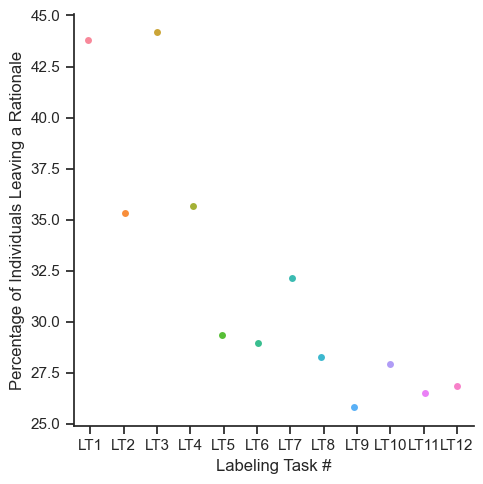

In [99]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
ax = sns.catplot(
    data=rationale_plot, x='questions', y='percent_rationales'
)
plt.xlabel('Labeling Task #')
plt.ylabel('Percentage of Individuals Leaving a Rationale')
plt.savefig('plot/rationale_per_task_experiments_full_study.eps', format='eps', dpi=1000)
plt.show()

### General Stats - Mean Number of Rationales left per Condition

In [100]:
# Mean number of rationales left per condition
group_conditions = data.groupby(['Explanation_style'],as_index=True).agg({
                                                                    'rationaleSum': ['mean', 'std', 'count']}).reset_index(drop=False)

group_conditions

Explanation_style rationaleSum                
                            mean       std count
0                CE     4.064516  4.911846    93
1                NE     3.440860  4.504738    93
2                SM     4.030928  4.906317    97

In [101]:
# Mean number of rationales left by condition and race
group_cond_race = data.groupby(['Explanation_style', 'Asian_race'],as_index=True).agg({
                                                                    'rationaleSum': ['mean', 'std', 'count']}).reset_index(drop=False)

group_cond_race

Explanation_style Asian_race rationaleSum                
                                       mean       std count
0                CE          0     3.595745  4.679556    47
1                CE          1     4.543478  5.145468    46
2                NE          0     3.437500  4.694525    48
3                NE          1     3.444444  4.346135    45
4                SM          0     3.812500  4.702450    48
5                SM          1     4.244898  5.137812    49

### Chi-squared

In [102]:
# Number of people who left each number of rationales by explanation style
group_rationale_count = data.groupby(['Explanation_style', 'rationaleSum'])["rationaleSum"].count().unstack(fill_value=0).stack()
group_rationale_count

Explanation_style  rationaleSum
CE                 0               40
                   1                7
                   2                5
                   3                5
                   4                3
                   5                5
                   6                2
                   7                1
                   8                1
                   9                1
                   10               1
                   11               1
                   12              21
NE                 0               43
                   1                6
                   2                8
                   3                3
                   4                6
                   5                3
                   6                2
                   7                3
                   8                2
                   9                1
                   10               0
                   11               0
                  

In [103]:
rationale_count_CE = group_rationale_count[0:13].to_list()
rationale_count_NE = group_rationale_count[13:26].to_list()
rationale_count_SM = group_rationale_count[26:].to_list()

In [104]:
# Chi-squared on number of people who left each number of rationale (ex. 0 rationales vs 1 rationale vs 12)
chi_data = [rationale_count_CE, rationale_count_NE, rationale_count_SM]
stats.chi2_contingency(chi_data)

Chi2ContingencyResult(statistic=11.126562950594385, pvalue=0.9880803259916703, dof=24, expected_freq=array([[41.73498233,  6.57243816,  5.58657244,  3.61484099,  4.60070671,
         3.61484099,  1.64310954,  2.30035336,  1.97173145,  1.31448763,
         0.32862191,  0.65724382, 19.06007067],
       [41.73498233,  6.57243816,  5.58657244,  3.61484099,  4.60070671,
         3.61484099,  1.64310954,  2.30035336,  1.97173145,  1.31448763,
         0.32862191,  0.65724382, 19.06007067],
       [43.53003534,  6.85512367,  5.82685512,  3.77031802,  4.79858657,
         3.77031802,  1.71378092,  2.39929329,  2.0565371 ,  1.37102473,
         0.34275618,  0.68551237, 19.87985866]]))

In [105]:
# Number of people who left each number of rationales by race and explanation type
group_rationale_count_race = data.groupby(['Explanation_style', 'Asian_race', 'rationaleSum'])["rationaleSum"].count().unstack(fill_value=0).stack()
group_rationale_count_race

Explanation_style  Asian_race  rationaleSum
CE                 0           0               22
                               1                3
                               2                3
                               3                3
                               4                0
                                               ..
SM                 1           8                2
                               9                0
                               10               0
                               11               0
                               12              13
Length: 78, dtype: int64

In [106]:
def remove_zeros(lst1, lst2):
  zero_idxs = []
  for idx in range(13):
    if lst1[idx] == 0 and lst2[idx] == 0:
      zero_idxs.append(idx)

  idx_offset = 0
  for z_idx in zero_idxs:
    del (lst1[z_idx - idx_offset])
    del (lst2[z_idx - idx_offset])
    idx_offset += 1

In [107]:
rationale_count_CE_NonAsian = group_rationale_count_race[0:13].to_list()
rationale_count_CE_Asian = group_rationale_count_race[13:26].to_list()
rationale_count_NE_NonAsian = group_rationale_count_race[26:39].to_list()
rationale_count_NE_Asian = group_rationale_count_race[39:52].to_list()
rationale_count_SM_NonAsian = group_rationale_count_race[52:65].to_list()
rationale_count_SM_Asian = group_rationale_count_race[65:].to_list()

In [108]:
# must remove frequencies of zeros at same index in both arrays for chi-squared
remove_zeros(rationale_count_NE_NonAsian, rationale_count_NE_Asian)
remove_zeros(rationale_count_CE_NonAsian, rationale_count_CE_Asian)
remove_zeros(rationale_count_SM_NonAsian, rationale_count_SM_Asian)

In [109]:
# Chi-squared on Asian vs non-Asian in Counterfactual Explanation
chi_data_CE = [[rationale_count_CE_NonAsian, rationale_count_CE_Asian]]
stats.chi2_contingency(chi_data_CE)

Chi2ContingencyResult(statistic=11.562012686665787, pvalue=0.4814640625499741, dof=12, expected_freq=array([[[20.21505376,  3.53763441,  2.52688172,  2.52688172,
          1.51612903,  2.52688172,  1.01075269,  0.50537634,
          0.50537634,  0.50537634,  0.50537634,  0.50537634,
         10.61290323],
        [19.78494624,  3.46236559,  2.47311828,  2.47311828,
          1.48387097,  2.47311828,  0.98924731,  0.49462366,
          0.49462366,  0.49462366,  0.49462366,  0.49462366,
         10.38709677]]]))

In [110]:
# Chi-squared on Asian vs non-Asian in No Explanation
chi_data_NE = [rationale_count_NE_NonAsian, rationale_count_NE_Asian]
stats.chi2_contingency(chi_data_NE)

Chi2ContingencyResult(statistic=8.743719718992248, pvalue=0.5565860468844865, dof=10, expected_freq=array([[22.19354839,  3.09677419,  4.12903226,  1.5483871 ,  3.09677419,
         1.5483871 ,  1.03225806,  1.5483871 ,  1.03225806,  0.51612903,
         8.25806452],
       [20.80645161,  2.90322581,  3.87096774,  1.4516129 ,  2.90322581,
         1.4516129 ,  0.96774194,  1.4516129 ,  0.96774194,  0.48387097,
         7.74193548]]))

In [111]:
# Chi-squared on Asian vs non-Asian in Saliency Map
chi_data_SM = [rationale_count_SM_NonAsian, rationale_count_SM_Asian]
stats.chi2_contingency(chi_data_SM)

Chi2ContingencyResult(statistic=10.524142573696146, pvalue=0.48394512295041225, dof=11, expected_freq=array([[21.77319588,  3.46391753,  1.97938144,  1.48453608,  2.4742268 ,
         1.48453608,  0.49484536,  1.48453608,  1.48453608,  0.98969072,
         0.49484536, 10.39175258],
       [22.22680412,  3.53608247,  2.02061856,  1.51546392,  2.5257732 ,
         1.51546392,  0.50515464,  1.51546392,  1.51546392,  1.01030928,
         0.50515464, 10.60824742]]))